In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import arviz as az
import pymc as pm
from pathlib import Path
from peak_performance import pipeline as pl, models, plots
from matplotlib import pyplot as plt

# Load and inspect raw intensity data

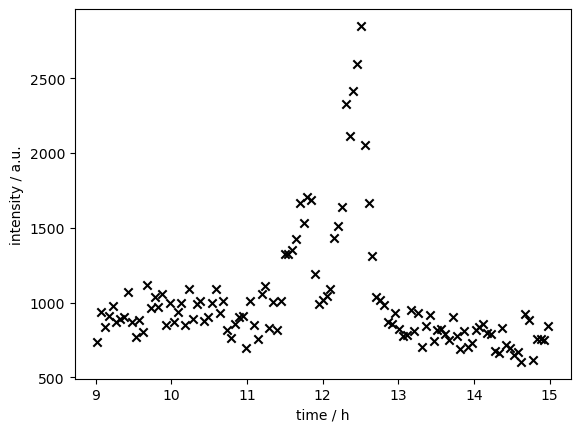

In [2]:
timeseries = np.load(Path(r"..\example\A2t2R1Part1_132_85.9_86.1.npy"))

fig, ax = plt.subplots()
ax.scatter(timeseries[0], timeseries[1], marker="x", color="black")
ax.set(
    xlabel="time / h",
    ylabel="intensity / a.u.",
)
plt.show()

# Define a peak model

c:\Users\osthege\AppData\Local\mambaforge\envs\pepe\Lib\site-packages\pymc\data.py:273: FutureWarning: ConstantData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(


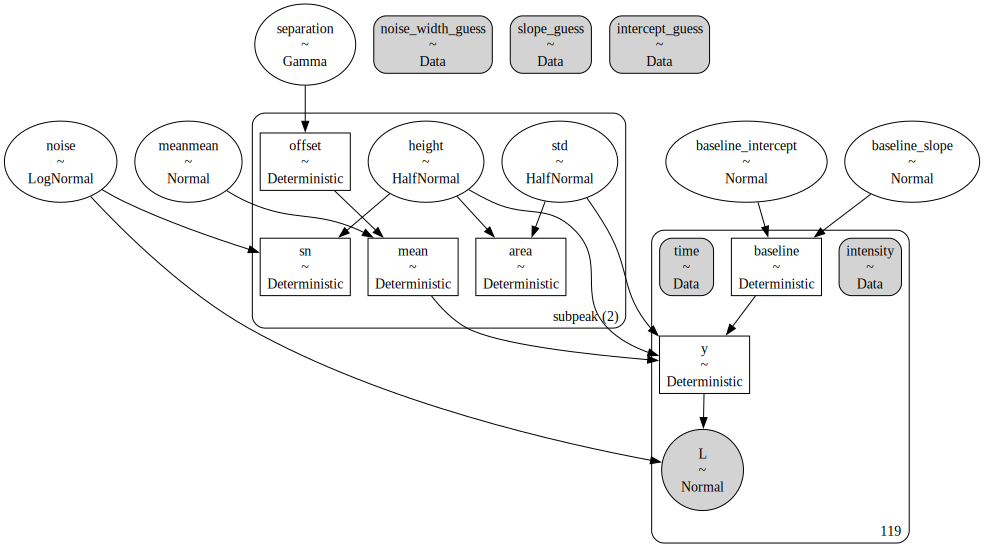

In [3]:
pmodel = models.define_model_double_normal(
    time=timeseries[0],
    intensity=timeseries[1]
)
pmodel.to_graphviz()

# Inspect priors for separation and retention time

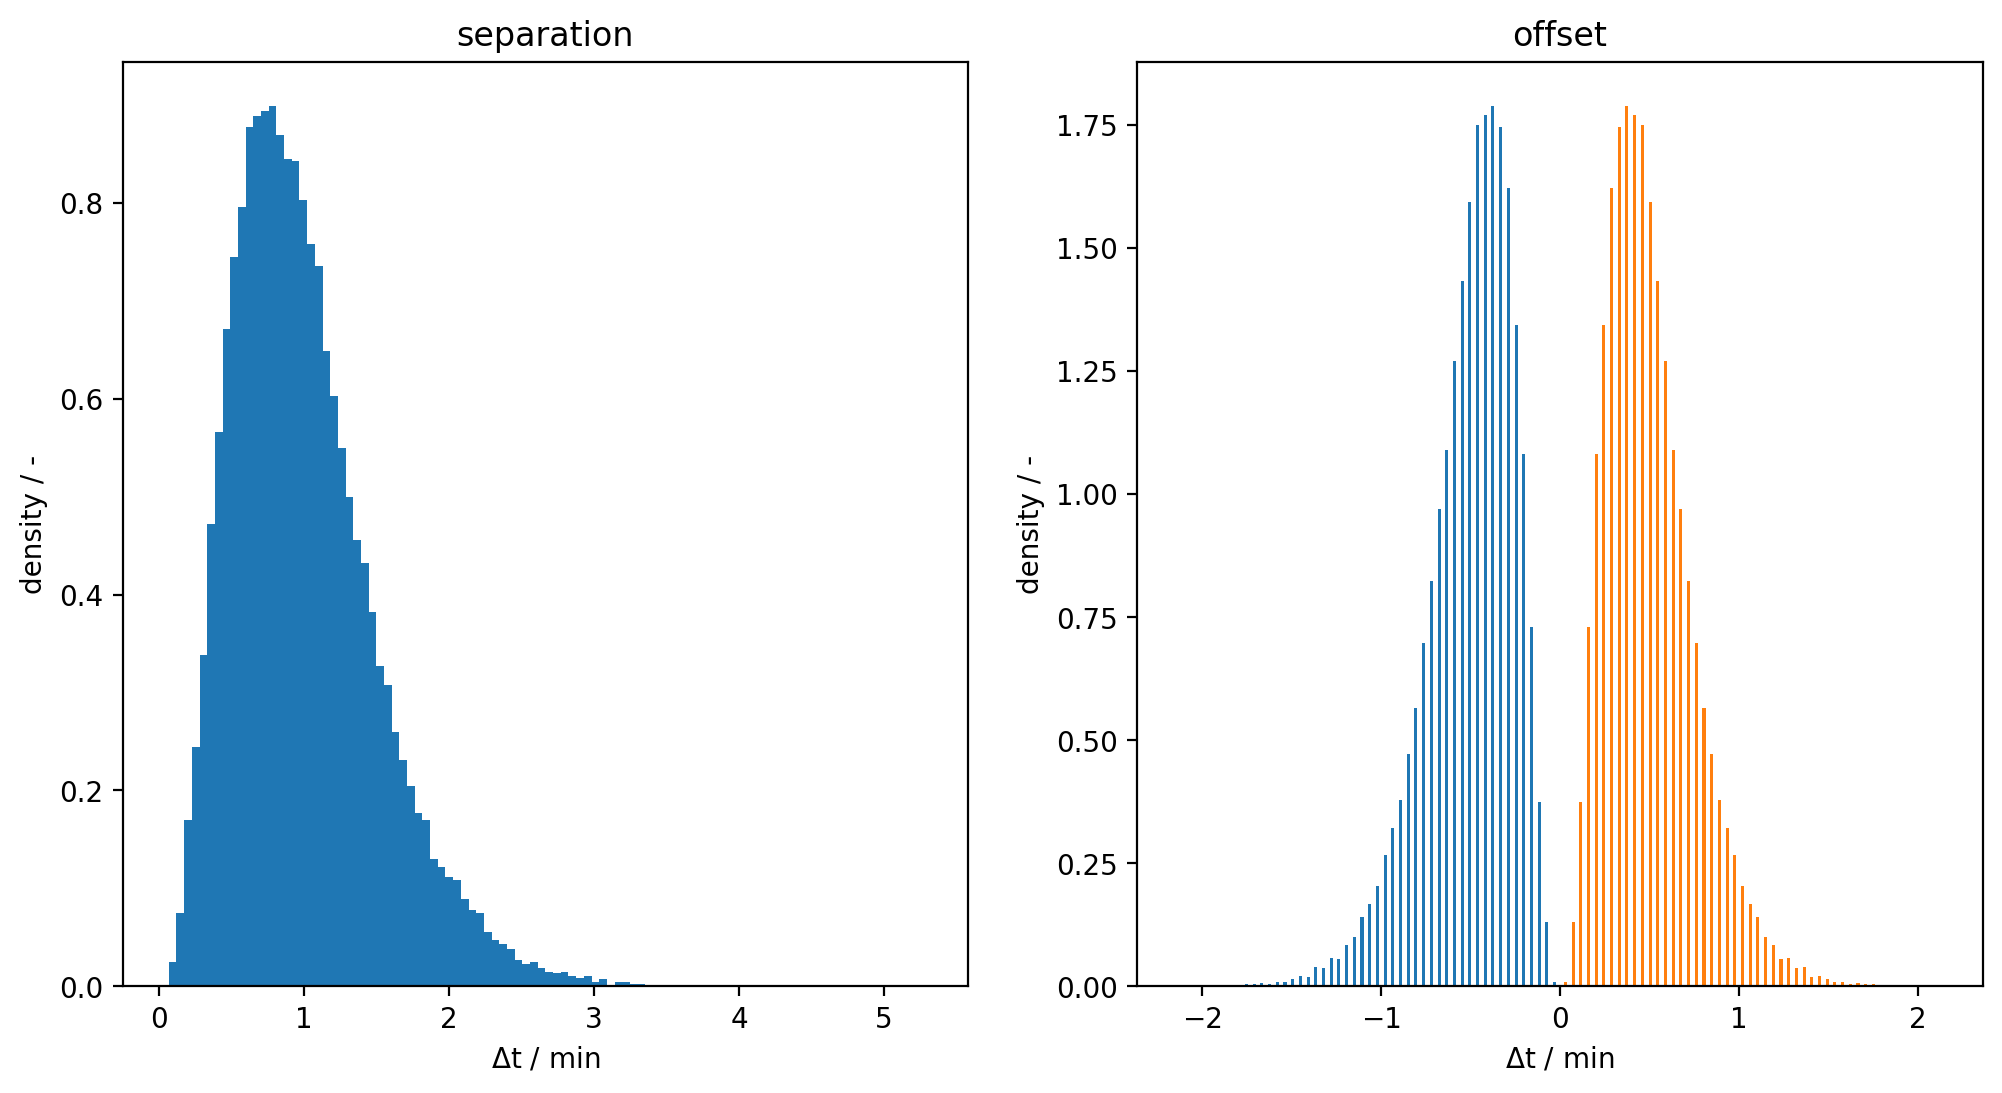

In [4]:
fig, axs = plt.subplots(dpi=200, ncols=2, figsize=(12, 6))
ax = axs[0]
ax.hist(pm.draw(pmodel["separation"], draws=50000), bins=100, density=True)
ax.set(ylabel="density / -", xlabel="$\mathrm{\Delta t\ /\ min}$", title="separation")

ax = axs[1]
ax.hist(pm.draw(pmodel["offset"], draws=50000), bins=100, density=True)
ax.set(ylabel="density / -", xlabel="$\mathrm{\Delta t\ /\ min}$", title="offset")
plt.show()

# Run MCMC sampling and inspect results

In [5]:
idata = pl.sampling(pmodel, tune=6_000, draws=2000)
idata = pl.posterior_predictive_sampling(pmodel, idata)
idata

Sampling: [L, baseline_intercept, baseline_slope, height, meanmean, noise, separation, std]


Sampling: []


Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> prior
	> prior_predictive
	> observed_data
	> constant_data

Warmup iterations saved (warmup_*).

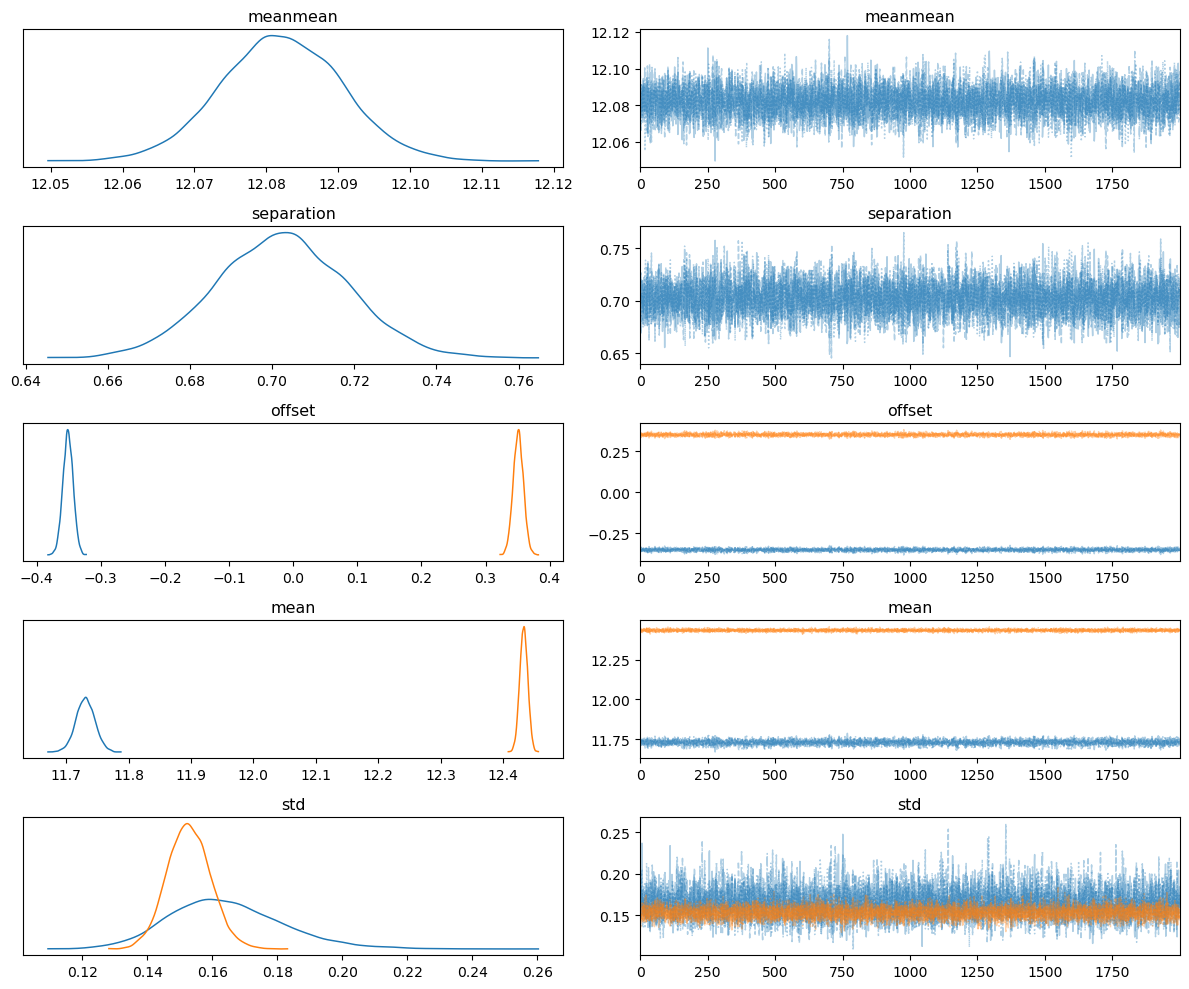

In [6]:
az.plot_trace(idata, var_names=["meanmean", "separation", "offset", "mean", "std"], combined=True)
plt.tight_layout()
plt.show()

In [7]:
summary = az.summary(idata, var_names=["~y", "~baseline", "offset"])
summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
area[0],317.283,28.309,263.235,368.820,0.274,0.195,10710.0,5898.0,1.0
area[1],674.686,26.489,624.835,724.355,0.249,0.176,11319.0,6016.0,1.0
baseline_intercept,1116.471,38.182,1047.076,1189.125,0.703,0.498,2956.0,3665.0,1.0
baseline_slope,-21.718,3.020,-27.095,-15.905,0.056,0.039,2953.0,3744.0,1.0
height[0],774.669,64.305,656.040,897.194,0.774,0.547,6896.0,6162.0,1.0
height[1],1762.802,65.228,1643.285,1887.333,0.747,0.529,7614.0,6491.0,1.0
height_log__[0],6.649,0.084,6.486,6.799,0.001,0.001,6896.0,6162.0,1.0
height_log__[1],7.474,0.037,7.406,7.544,0.000,0.000,7614.0,6491.0,1.0
mean[0],11.731,0.015,11.702,11.759,0.000,0.000,5518.0,5044.0,1.0
mean[1],12.433,0.006,12.421,12.445,0.000,0.000,10917.0,6279.0,1.0


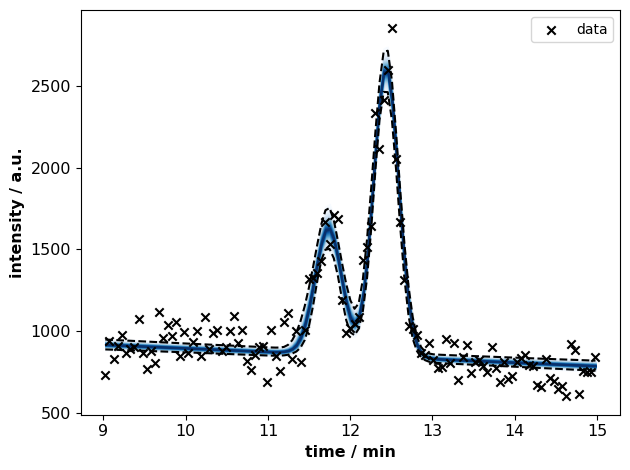

In [8]:
plots.plot_posterior_predictive(
    identifier="peak_fit",
    time=idata.constant_data.time.values,
    intensity=idata.constant_data.intensity.values,
    path=None,
    idata=idata,
    discarded=False,
)

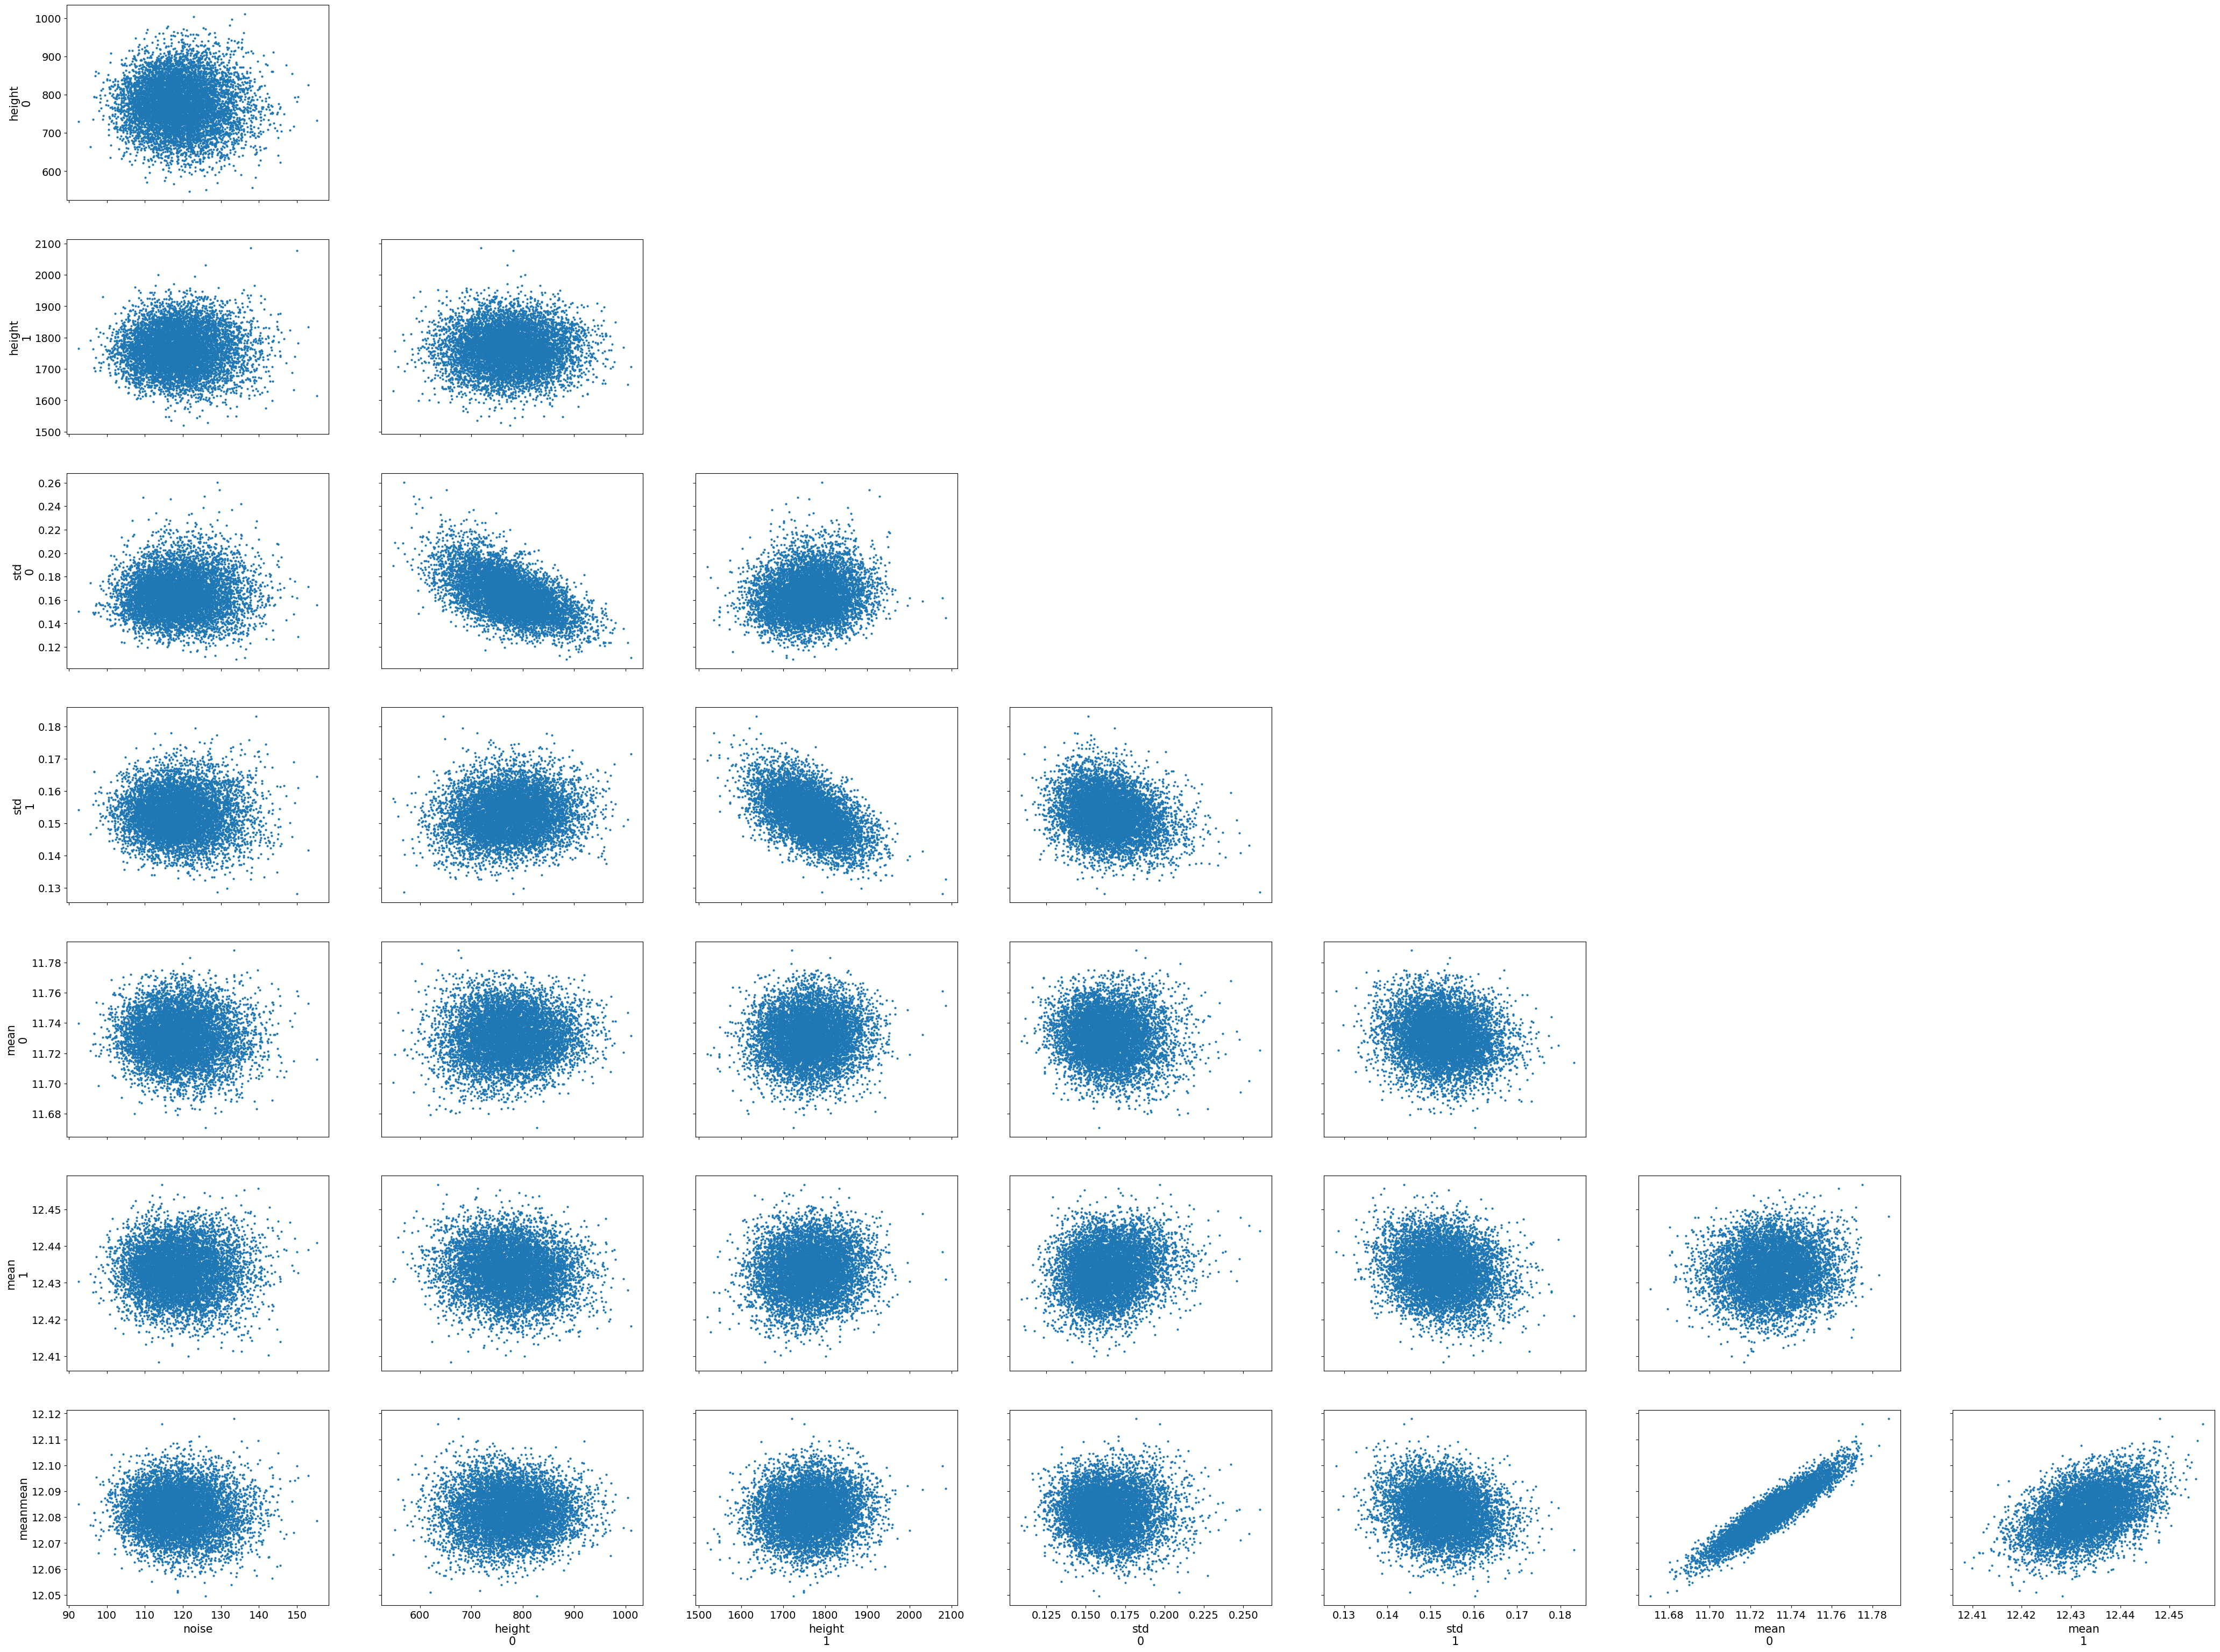

In [9]:
az.plot_pair(idata, var_names="noise,height,std,mean,meanmean".split(","));

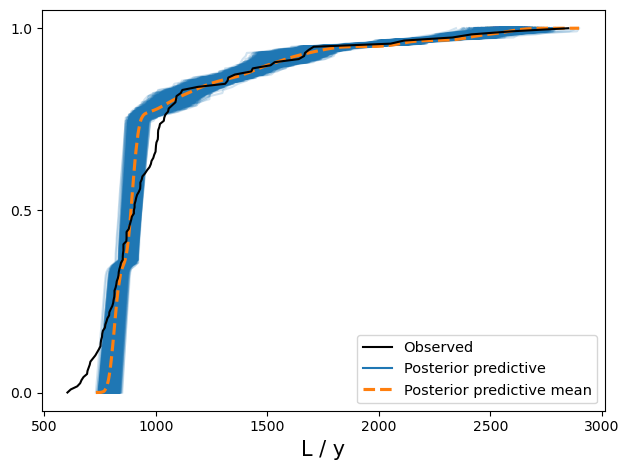

In [10]:
axs = az.plot_ppc(
    idata,
    data_pairs={"L":"y"},
    var_names=["L"],
    kind="cumulative",
    # backend_kwargs=dict(sharey=True),
)
fig = plt.gcf()
ax.set(
    ylabel="cumulative density / -",
    xlabel="intensity / a.u.",
)
plt.tight_layout()

In [12]:
%load_ext watermark
%watermark -idu

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: 2024-05-11T12:05:51.790371+02:00

